In [1]:
import matplotlib
matplotlib.use('agg')
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf.__version__)

1.3.0


In [5]:
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader

## Prepare data

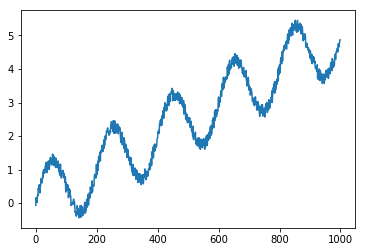

In [7]:
X = np.array(range(1000))
noise = np.random.uniform(-0.2, 0.2, 1000)
y = np.sin(np.pi * X / 100) + X / 200. + noise
plt.plot(X, y)
plt.savefig("img/timeseries_y.jpg")

In [11]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: X,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y
}

# or 
data = {"times": X, "values": y}

In [12]:
reader = NumpyReader(data)

In [22]:
full_data = reader.read_full()
print(full_data)

{'times': <tf.Tensor 'Squeeze_4:0' shape=(1000,) dtype=int32>, 'values': <tf.Tensor 'Squeeze_5:0' shape=(1000, 1) dtype=float64>}


## How to use `full_data`

In [23]:
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    print(sess.run(full_data))
 
    coord.request_stop()


{'times': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 17

## Read data by batch

In [16]:
train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader,
                                                           batch_size=2,
                                                           window_size=10)

In [24]:
batch_data = train_input_fn.create_batch()
print(batch_data)

({'times': <tf.Tensor 'shuffle_batch_2:0' shape=(2, 10) dtype=int32>, 'values': <tf.Tensor 'shuffle_batch_2:1' shape=(2, 10, 1) dtype=float64>}, None)


In [31]:
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    one_batch = sess.run(batch_data[0])

    coord.request_stop()

print("[times] shape({}):\n".format(one_batch["times"].shape), one_batch["times"])
print("[values] shape({}):\n".format(one_batch["values"].shape), one_batch["values"])

[times] shape((2, 10)):
 [[88 89 90 91 92 93 94 95 96 97]
 [78 79 80 81 82 83 84 85 86 87]]
[values] shape((2, 10, 1)):
 [[[ 0.91039732]
  [ 0.97584929]
  [ 0.79661634]
  [ 0.76943365]
  [ 0.7466473 ]
  [ 0.87919532]
  [ 0.80606148]
  [ 0.7428767 ]
  [ 0.61535201]
  [ 0.77906683]]

 [[ 0.83435229]
  [ 0.85799016]
  [ 0.98156381]
  [ 1.15951438]
  [ 0.95425846]
  [ 0.83257457]
  [ 0.74696733]
  [ 0.94885085]
  [ 0.92957604]
  [ 0.89285922]]]
